## SURNAME: Caprile NAME: Riccardo

In [ ]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from skimage import draw as drw
from skimage import data, color, exposure, img_as_float, img_as_ubyte, morphology, filters 
from skimage import io

import skimage
%matplotlib inline

## 1- Background
Let's visualize an empty scene captured by a fixed camera, and the same scene where objects are present

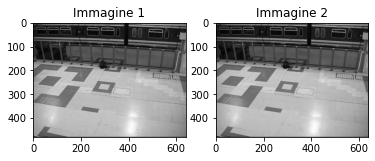

In [2]:
filename='images/es1/EmptyScene01.jpg'
I1=io.imread(filename)
filename='images/es1/EmptyScene02.jpg'
I2=io.imread(filename)
Ig1=img_as_float(color.rgb2gray(I1))
Ig2=img_as_float(color.rgb2gray(I2))

plt.subplot(121)
plt.imshow(Ig1,cmap='gray')
plt.title('Immagine 1')
plt.subplot(122)
plt.imshow(Ig2,cmap='gray')
plt.title('Immagine 2');

Let's try to see the difference in terms of Grayscale intensities of corresponding pixels across the two images

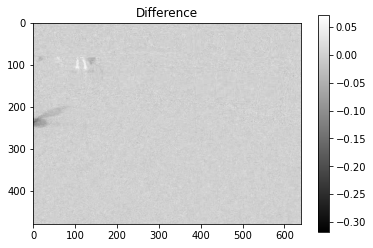

In [3]:
D = Ig1 - Ig2
 
plt.imshow(D,cmap='gray')
plt.title('Difference')
plt.colorbar()
plt.show()

Indeed, the difference seems to be small for most pixels:

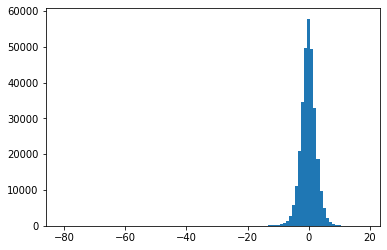

In [4]:
# multiplying by 255 to get a feeling of the differences entity
# with respect to input values
plt.hist(255*D.ravel(),100);

### Analysis

- Comment the histogram you just visualized

**Comment** 

We can see that the histogram x-axis values range from -80 to 20 , probably because there is a value minor to -80.

It is easy to see that the majority of pixels has the same value.

Then , we see that the histogram has a Gaussian shape centered in 0 , so the distribution of the real world noise it is like a Gaussian distribution



## 2- Change detection

You may try out different frames

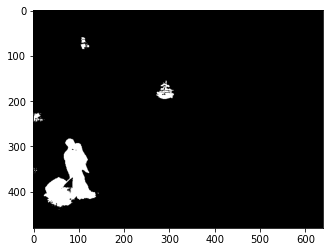

In [19]:
threshold =  0.10 #let's pick a threshold
filename='images/es1/video/frame0251.jpg'
It=io.imread(filename)
Itg=img_as_float(color.rgb2gray(It))
# check slide "Motion segmentation - CHANGE DETECTION"
Dabs=( abs(Ig1 - Itg) > threshold)
plt.imshow(Dabs,cmap='gray')
plt.show()

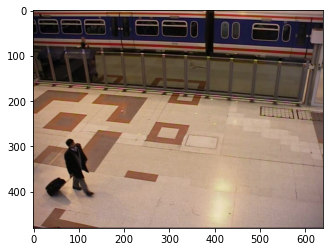

In [27]:
plt.imshow(It,cmap = "gray")

Have a look at the histogram of the differences to pick a better threshold

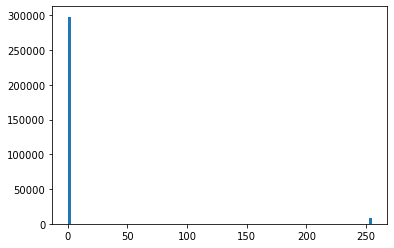

In [20]:
## fill in the code and add comments if appropriate

plt.hist(Dabs.ravel()*255,100);

**Comment** I've tried with 3 different thresholds

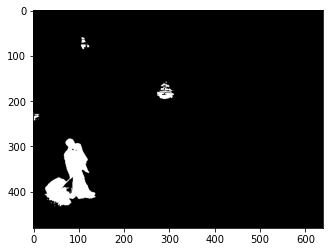

In [34]:
threshold = 30/255
Dabs=(abs(Ig1-Itg) > threshold)
plt.imshow(Dabs,cmap='gray')
plt.show()

**Comment**
In this case we have a low threshold , and we can clearly visualize a false positive such as the shadow of the suitcase of the tourist

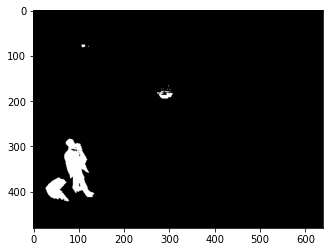

In [35]:
threshold = 70/255
Dabs=(abs(Ig1-Itg) > threshold)
plt.imshow(Dabs,cmap='gray')
plt.show()

**Comment**

At this point , we try to increase a little bit the threshold.

We have a better sight of the man but we are loosing details about the background

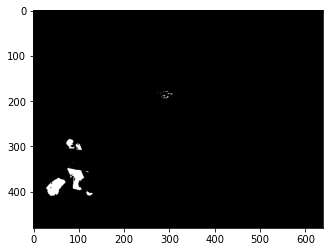

In [32]:
threshold = 140/255
Dabs=(abs(Ig1-Itg) > threshold)
plt.imshow(Dabs,cmap='gray')
plt.show()

**Comment**

Now we increase the threshold more , and the man is badly detected.

The part which is not detected , is the one where the colors of the jacket and the floor look the "same"

If you want <b> (meaning it is optional) </b>  you may improve the results with an appropriate post processing. Binary images may be cleaned by means of <a href="https://en.wikipedia.org/wiki/Mathematical_morphology">Morphology operations</a>


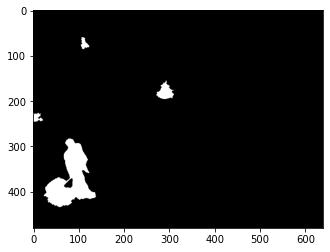

In [21]:
from skimage import morphology as mp
from skimage import data, util
from skimage.measure import label

mask=mp.disk(2) # the structuring element size controls the filling/deletion scale

Dabs=mp.closing(Dabs,mask)
Dabs=skimage.morphology.remove_small_objects(Dabs,100)
plt.imshow(Dabs,cmap='gray')
plt.show()
 